# Day 08. Exercise 04
# Regression

## 0. Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [7]:
df = pd.read_csv('../../datasets/data/checker_regression.csv')
df.fillna(0, inplace=True)
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [8]:
X = df.drop('AVG(diff)', axis=1)
X['uid'] = X['uid'].str.replace('user_', '').astype(int)
y = df['AVG(diff)']

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [24]:
def crossval(n_splits, X, y, model):
    kfold = KFold(n_splits=n_splits, random_state=21, shuffle=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    score_test = cross_val_score(model, X_test, y_test, cv=kfold, scoring='neg_mean_squared_error')
    predict = cross_val_predict(model, X_test, y_test, cv=kfold)
    mse = mean_squared_error(y_test, predict)

    for i in range(len(score)):
        print(f'train - {score[i]} | test - {score_test[i]}')
    rmse = np.sqrt(mse)
    print(f'Average RMSE on crossval is {rmse}')

In [25]:
linear_reg_model = LinearRegression()
crossval(10, X, y, linear_reg_model)

train - -1589.0512060007745 | test - -2064.92859993386
train - -3183.328925357611 | test - -1821.9102482606493
train - -1303.7821092937832 | test - -327.2783875483113
train - -5673.019931808743 | test - -8385.006866523907
train - -834.4946205768421 | test - -24413.329672336247
train - -933.7170249616962 | test - -3112.43143989265
train - -3669.1441872198534 | test - -265.2795627154094
train - -288.0778762004243 | test - -127.31234356868792
train - -2184.660670887447 | test - -622.8231049526138
train - -1650.8829123322303 | test - -6595.692932551494
Average RMSE on crossval is 74.1033393194849


In [28]:
regress_tree_model = DecisionTreeRegressor(random_state=21)
crossval(10, X, y, regress_tree_model)

train - -210.65142857142862 | test - -0.0
train - -336.0016666666667 | test - -0.0
train - -2147.0416666666665 | test - -0.0
train - -2677.2933333333335 | test - -1656.625
train - -368.1666666666667 | test - -22058.73
train - -549.1266666666668 | test - -0.0
train - -2306.2357407407403 | test - -0.0
train - -2862.193333333333 | test - -0.0
train - -3330.800046296296 | test - -0.0
train - -466.40166666666664 | test - -1640.25
Average RMSE on crossval is 55.37991513175151


In [27]:
regress_forest_model = RandomForestRegressor(random_state=21)
crossval(10, X, y, regress_forest_model)

train - -8.369831253968643 | test - -9.999391999999999
train - -766.5129453750001 | test - -2022.9752980000007
train - -1906.3124506666663 | test - -2102.3721680000012
train - -2161.1797283703713 | test - -8256.02238850001
train - -599.6667129629623 | test - -19175.461825
train - -53.206933407406744 | test - -7.994460499999999
train - -2547.8118134074093 | test - -47.265625
train - -1707.5763640416628 | test - -152.7696
train - -334.4109037777766 | test - -0.0
train - -369.65127140740697 | test - -807.0712809999999
Average RMSE on crossval is 63.32296067087358


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [30]:
lr_model = LinearRegression(fit_intercept=True, copy_X=True)
lr_model.fit(X_train, y_train)
print(f'mean squared error: {mean_squared_error(y_test, lr_model.predict(X_test))}')

mean squared error: 3031.927706672527


In [32]:
params = {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
regress_forest_model = RandomForestRegressor(**params)
regress_forest_model.fit(X_train, y_train)
print(f'mean squared error: {mean_squared_error(y_test, regress_forest_model.predict(X_test))}')

mean squared error: 2068.5367263641974


In [33]:
params = {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
regress_tree_model = DecisionTreeRegressor(**params)
regress_tree_model.fit(X_train, y_train)
print(f'mean squared error: {mean_squared_error(y_test, regress_tree_model.predict(X_test))}')

mean squared error: 2738.7531423611103


In [41]:
def plot_predictions(model_name, y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel('avg diff')
    plt.ylabel(f'predictions made by {model_name}')
    plt.tight_layout()
    plt.show()

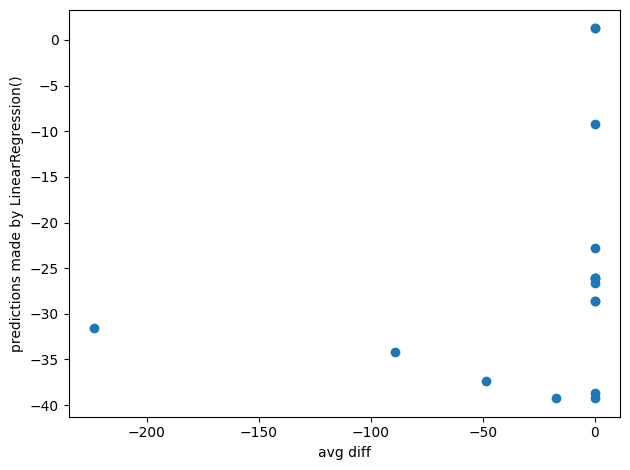

In [42]:
plot_predictions(lr_model, y_test, lr_model.predict(X_test))

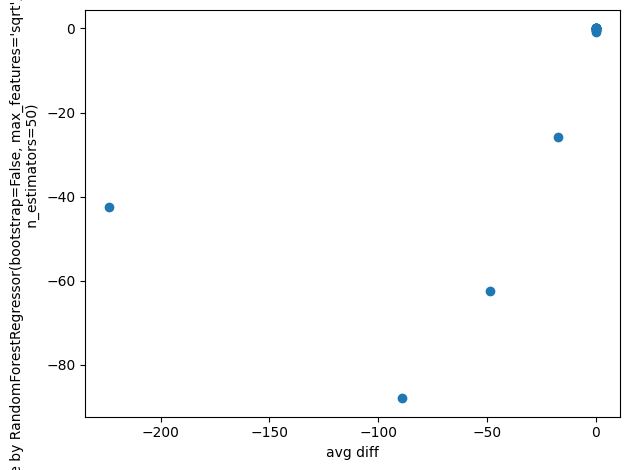

In [43]:
plot_predictions(regress_forest_model, y_test, regress_forest_model.predict(X_test))

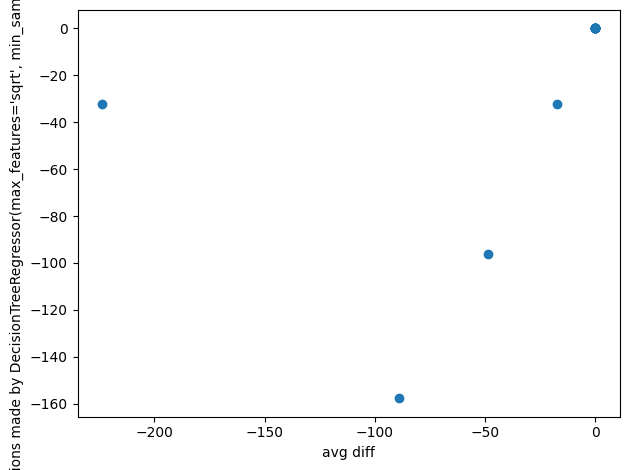

In [44]:
plot_predictions(regress_tree_model, y_test, regress_tree_model.predict(X_test))

All of the dots would be on a straight line.